In [82]:
import tal
import os

""" TODO this tutorial is WIP """

# TODO: if you want to follow this tutorial,
# you need to have rendered the scene using the "tal render nlos-z.freq" shell command
# See README.md for more information
# Write here        vvvvvvvvvvvvvvv   the path to your rendered scene
root = 'nlos-z-freq/20250313-100430'

data = tal.io.read_capture(os.path.join(root, 'nlos-z-freq.hdf5'))

In [83]:
# because this is a test scene, we know the hidden geometry
# is located at Z = 1
# this volume_xyz is coplanar to the relay wall (rw) at Z=1
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[1.0,])
print(volume_xyz.shape)

(64, 64, 1, 3)


In [84]:
print(data.H.shape)

(231, 64, 64)


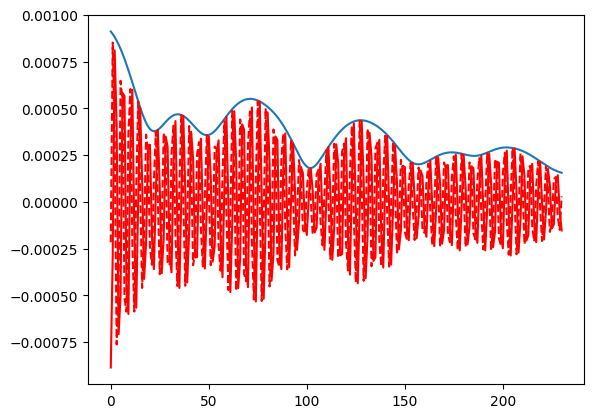

In [85]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.abs(data.H[:, 0, 0]))
plt.plot(np.real(data.H[:, 0, 0]), c='r')
plt.plot(np.imag(data.H[:, 0, 0]), c='r', linestyle='--')

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 231 wavelengths from 0.0399m to 0.1204m
tal.reconstruct.pf_dev: projector_focus_mode=confocal
tal.reconstruct.pf_dev: Will use divide_frequencies implementation


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 231/231 [00:00<00:00, 803.40it/s]


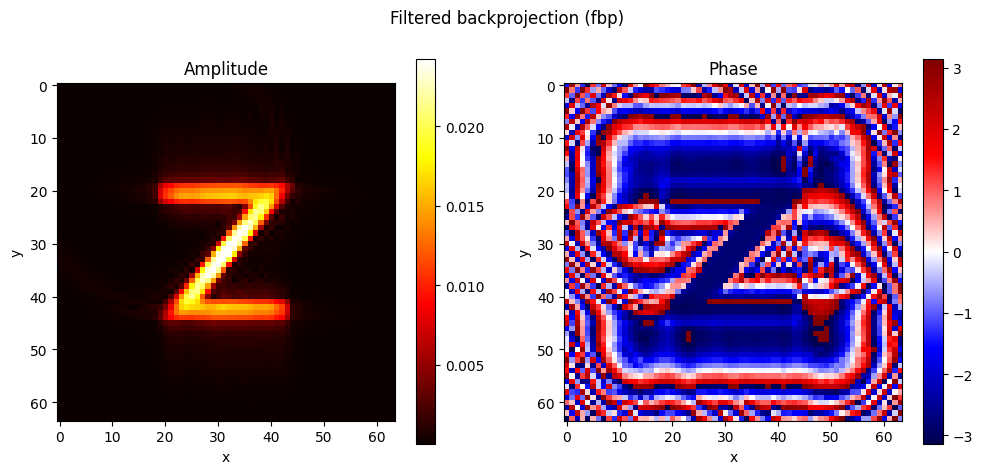

In [86]:
# Here is a reconstruction using filtered backprojection
# By default:
# * The filtering applied, by default, is the phasor field filter with the
#       wl_mean and wl_sigma specified
# * It is single-threaded (see tal.resources to see how to multi-thread)
H_1 = tal.reconstruct.pf_dev.solve(data, wl_mean=0.06, wl_sigma=0.06,
                                volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT,
                                skip_H_fft=True, skip_H_padding=True, nt=4096)
tal.plot.amplitude_phase(H_1, title='Filtered backprojection (fbp)')